# Homework

We solve the image reconstruction problem, but this time using `JuMP`. We are given a noisy image, and we want to clean the image up. 

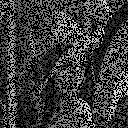

In [2]:
using Images
lenna = load("lena128missing.png") 
# put the image lena128missing.png in the same folder, where your julia file or ipynb file resides

In [3]:
# convert to real matrices
Y = Float64.(lenna);

In [4]:
observed_entries_Y = findall(x->x!=0.0, Y);

We want to solve:

\begin{array}{ll}
\underset{X}{\mbox{minimize}} & \| X \|_\star \\
\mbox{subject to} & X_{i,j}=Y_{i,j},\quad(i,j)\in\text{observed pixels of }Y \quad \textsf{(IMGOPT)}
\end{array}

The problem above can be formulated as an SDP. This time we will use `JuMP`.

To that goal, use the result from [Lemma 1 Fazel et. al. (2001)]  ([paper here](https://web.stanford.edu/~boyd/papers/pdf/rank_min_heur_sys_approx.pdf))

$$
\left(\|X\|_{\star}\leq t\right)\Leftrightarrow\begin{bmatrix}U & X\\
X^{\top} & V
\end{bmatrix}\succeq0,\mathbf{tr}(U)+\mathbf{tr}(V)\leq2t.
$$

By introducing a new variable, write the optimization problem (IMGOPT) in a way so that you can apply the result above directly.

Next, use the `JuMP` syntax to encode positive-semidefiniteness of a matrix $X\succeq 0$ as:

$X \succeq 0 \equiv$ `Symmetric(X) in PSDCone()` (put this in a Constraint)

#### But, I never solved an SDP in JuMP before 😟
Consider the following SDP:

\begin{array}{ll} \text{minimize} &  \text{tr}(CX)\\
\text{subject to} &  \text{tr}(A X) = b \\
                  &  X \succeq 0,
\end{array}

where

$A = \begin{bmatrix} 1 & 5 \\ 5 & 2\end{bmatrix},$
$C = \begin{bmatrix} 1 & 2 \\ 2 & 2\end{bmatrix},$
$b = 4.$

You can solve this in `JuMP` with the following code:

```
using JuMP, Mosek, MosekTools, LinearAlgebra
# if M1 chip, then
# using COSMO, JuMP, LinearAlgebra

C =  [1. 2; 2 2]
A = [1. 5; 5 2]
b = 4.0;

m = Model(with_optimizer(COSMO.Optimizer));
@variable(m, X[1:2, 1:2], PSD)
@objective(m, Min, tr(C * X));
@constraint(m, tr(A * X) == b);
JuMP.optimize!(m);

status = JuMP.termination_status(m)
X_sol = JuMP.value.(X)
```

### Now solve (IMGOPT) using `JuMP`

* Provide the `JuMP` code
* After solving the problem using `JuMP`, please provide the trace of the optimal solution. For example, if `X_sol` is the solution matrix, then what is `tr(X_sol)`?